<a href="https://colab.research.google.com/github/judajuded2012/Suicide_Rates_Overview_1985_2016/blob/main/Suicide_Rates_Overview_1985_to_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Libraries


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

###Reading the Dataset

In [ ]:
df=pd.read_csv('//content/drive/MyDrive/Data set/archive (13).zip')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [ ]:
df.shape


(27820, 12)

###Checking Missing Values

In [ ]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [ ]:
df.loc[df['HDI for year'].isna(), ['country', 'year']].drop_duplicates()

,country,year
0,Albania,1987
12,Albania,1988
24,Albania,1989
36,Albania,1992
48,Albania,1993
...,...,...
27688,Uzbekistan,2001
27700,Uzbekistan,2002
27712,Uzbekistan,2003
27724,Uzbekistan,2004


###Data visualization

<Figure size 1008x576 with 0 Axes>

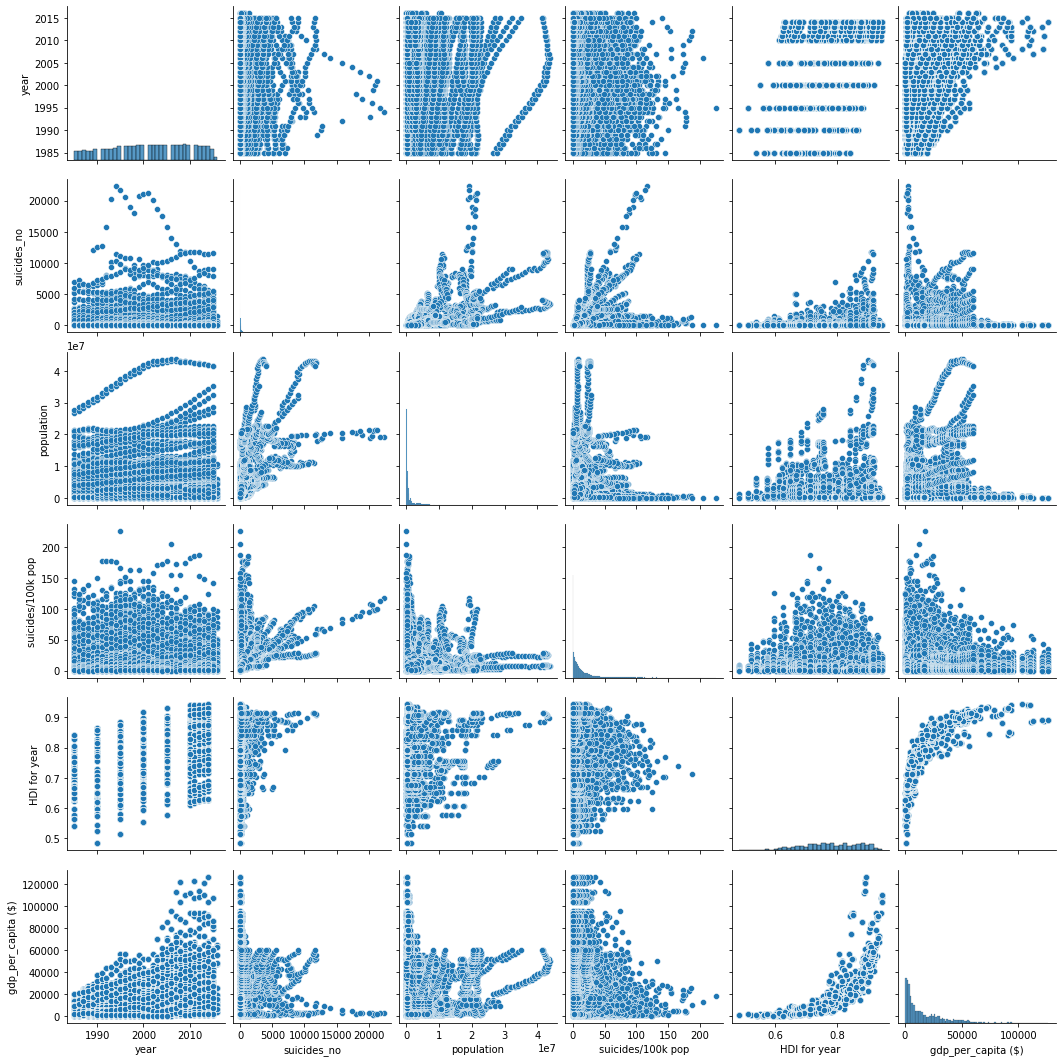

<Figure size 1008x576 with 0 Axes>

In [ ]:
sns.pairplot(data=df)
plt.figure(figsize=(14,8))

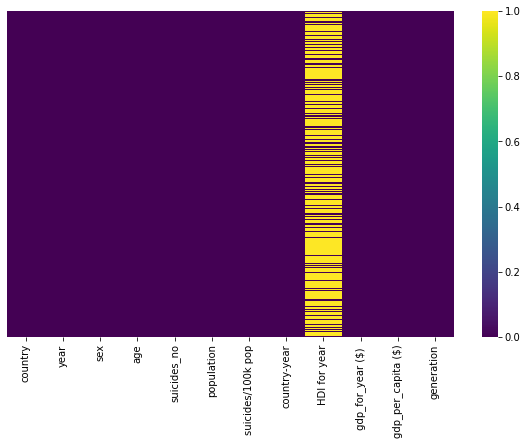

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


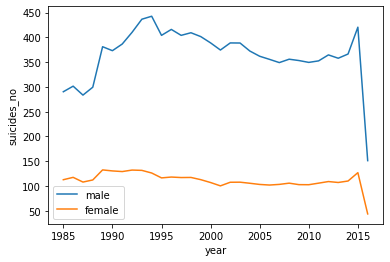

In [ ]:
df_men = df[df.sex == "male"]
df_women = df[df.sex == "female"]
sns.lineplot(df_men.year, df.suicides_no, ci = None)
sns.lineplot(df_women.year, df.suicides_no, ci = None)
plt.legend(["male", 'female'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


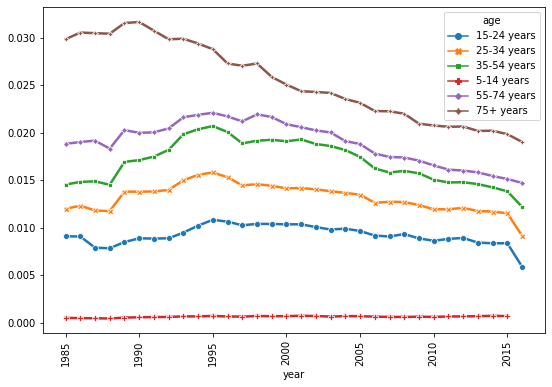

In [ ]:
df_age = df.groupby(["year","age"])["suicides_no", "population"].sum()
df_reset = df_age.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", df_reset.suicides_no*100/df_reset.population, hue = "age",
             data = df_reset, linewidth = 2.5, style = "age", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


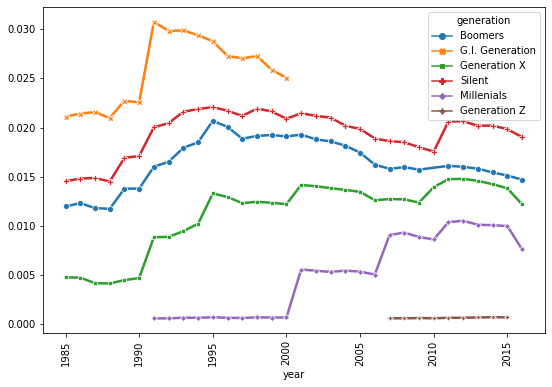

In [ ]:
df_generation = df.groupby(["year", "generation"])["suicides_no", "population"].sum()
df_generation_reset = df_generation.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", df_generation_reset.suicides_no*100/df_generation_reset.population, hue = "generation", 
            data = df_generation_reset, linewidth = 2.5, style = "generation", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

### correlaton


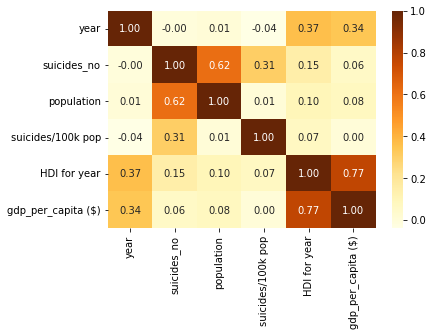

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='YlOrBr', fmt='.2f');


In [ ]:
df['HDI for year'].fillna(int(df['HDI for year'].mean()), inplace=True)

###Prepare the Data for Training


###Create the target column


In [ ]:
df['suicide_risk'] = 'low'
df.loc[df['suicides/100k pop'] > df['suicides/100k pop'].mean(), 'suicide_risk'] = 'high' 
df['suicide_risk'].value_counts()

low     19061
high     8759
Name: suicide_risk, dtype: int64

###Train ,Validation and Test sets

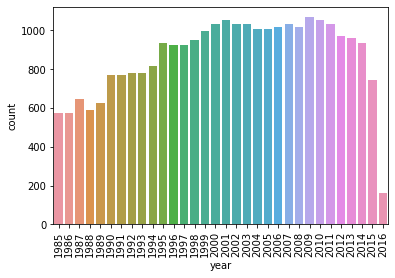

In [ ]:
sns.countplot(x='year', data=df)
plt.xticks(rotation='90');

In [ ]:

year_dt = df.year.value_counts()
year_dt.sort_index(inplace=True)
cum_pct = 100 * year_dt.cumsum() / year_dt.sum()
cum_pct

1985      2.070453
1986      4.140906
1987      6.470165
1988      8.583753
1989     10.826743
1990     13.587347
1991     16.347951
1992     19.151689
1993     21.955428
1994     24.888569
1995     28.253055
1996     31.574407
1997     34.895758
1998     38.303379
1999     41.883537
2000     45.593098
2001     49.388929
2002     53.098490
2003     56.808052
2004     60.431344
2005     64.054637
2006     67.721064
2007     71.430625
2008     75.097052
2009     78.936017
2010     82.731848
2011     86.441409
2012     89.935298
2013     93.386053
2014     96.750539
2015     99.424874
2016    100.000000
Name: year, dtype: float64

In [ ]:
train_df = df.loc[df['year'] <= 2004]
val_df = df.loc[(df['year'] >= 2005) & (df['year'] <=2010)]
test_df = df.loc[df['year'] >= 2011]

print('train_df.shape: ', train_df.shape)
print('val_df.shape: ', val_df.shape)
print('test_df.shape: ', test_df.shape)

train_df.shape:  (16812, 13)
val_df.shape:  (6204, 13)
test_df.shape:  (4804, 13)


In [ ]:
input_cols = ['country', 'sex', 'age', 'HDI for year', 'gdp_per_capita ($)']
target_col = 'suicide_risk'


In [ ]:
train_inputs = train_df.loc[:, input_cols]
train_target = train_df.loc[:, target_col]

val_inputs = val_df.loc[:, input_cols]
val_target = val_df.loc[:, target_col]

test_inputs = test_df.loc[:, input_cols]
test_target = test_df.loc[:, target_col]

###Identify the numeric and categorical columns.

In [ ]:
numeric_cols = list(train_inputs.select_dtypes(include=np.number).columns)
categorical_cols = list(train_inputs.select_dtypes(include='object').columns)

print('numeric columns: ', numeric_cols)
print('categorical columns: ', categorical_cols)

numeric columns:  ['HDI for year', 'gdp_per_capita ($)']
categorical columns:  ['country', 'sex', 'age']


###Scale Numeric Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Fit the scaler to all the data
scaler = MinMaxScaler().fit(df.loc[:, numeric_cols])

# Scale the train, validation and test sets 
train_inputs.loc[:, numeric_cols] = scaler.transform(train_inputs.loc[:, numeric_cols])
val_inputs.loc[:, numeric_cols] = scaler.transform(val_inputs.loc[:, numeric_cols])
test_inputs.loc[:, numeric_cols] = scaler.transform(test_inputs.loc[:, numeric_cols])

In [ ]:
train_inputs[numeric_cols].describe()

,HDI for year,gdp_per_capita ($)
count,16812.000000,16812.000000
mean,0.124971,0.091012
std,0.287635,0.098749
min,0.000000,0.000000
25%,0.000000,0.016384
50%,0.000000,0.042918
75%,0.000000,0.153068
max,0.971398,0.637489


###Encoding

In [ ]:
df[categorical_cols].nunique()

country    101
sex          2
age          6
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore').fit(df[categorical_cols])

In [ ]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))

# Encode the columns
train_inputs[encoded_cols] = encoder.transform(train_inputs.loc[:, categorical_cols]).toarray()
val_inputs[encoded_cols] = encoder.transform(val_inputs.loc[:, categorical_cols]).toarray()
test_inputs[encoded_cols] = encoder.transform(test_inputs.loc[:, categorical_cols]).toarray()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy

In [ ]:
df['HDI for year']

0        0.000
1        0.000
2        0.000
3        0.000
4        0.000
         ...  
27815    0.675
27816    0.675
27817    0.675
27818    0.675
27819    0.675
Name: HDI for year, Length: 27820, dtype: float64

In [ ]:
df['HDI for year'].fillna(int(df['HDI for year'].mean()), inplace=True)

In [ ]:
df['HDI for year']

0        0.000
1        0.000
2        0.000
3        0.000
4        0.000
         ...  
27815    0.675
27816    0.675
27817    0.675
27818    0.675
27819    0.675
Name: HDI for year, Length: 27820, dtype: float64

In [ ]:
print(df)


          country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
...           ...   ...     ...          ...          ...         ...   
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male   5-14 years           60     2762158   
27818  Uzbekistan  2014  female   5-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop    country-year  HDI for year  gdp_for_year ($)   \
0                   6.71     Albania1987      

In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

###Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, train_target)

DecisionTreeClassifier(random_state=1)

###Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

train_pred = tree.predict(X_train)
accuracy_score(train_target, train_pred)

1.0

In [ ]:
val_pred = tree.predict(X_val)
accuracy_score(val_target, val_pred)

0.8936170212765957

In [ ]:
val_target.value_counts() / len(val_target)

low     0.705029
high    0.294971
Name: suicide_risk, dtype: float64

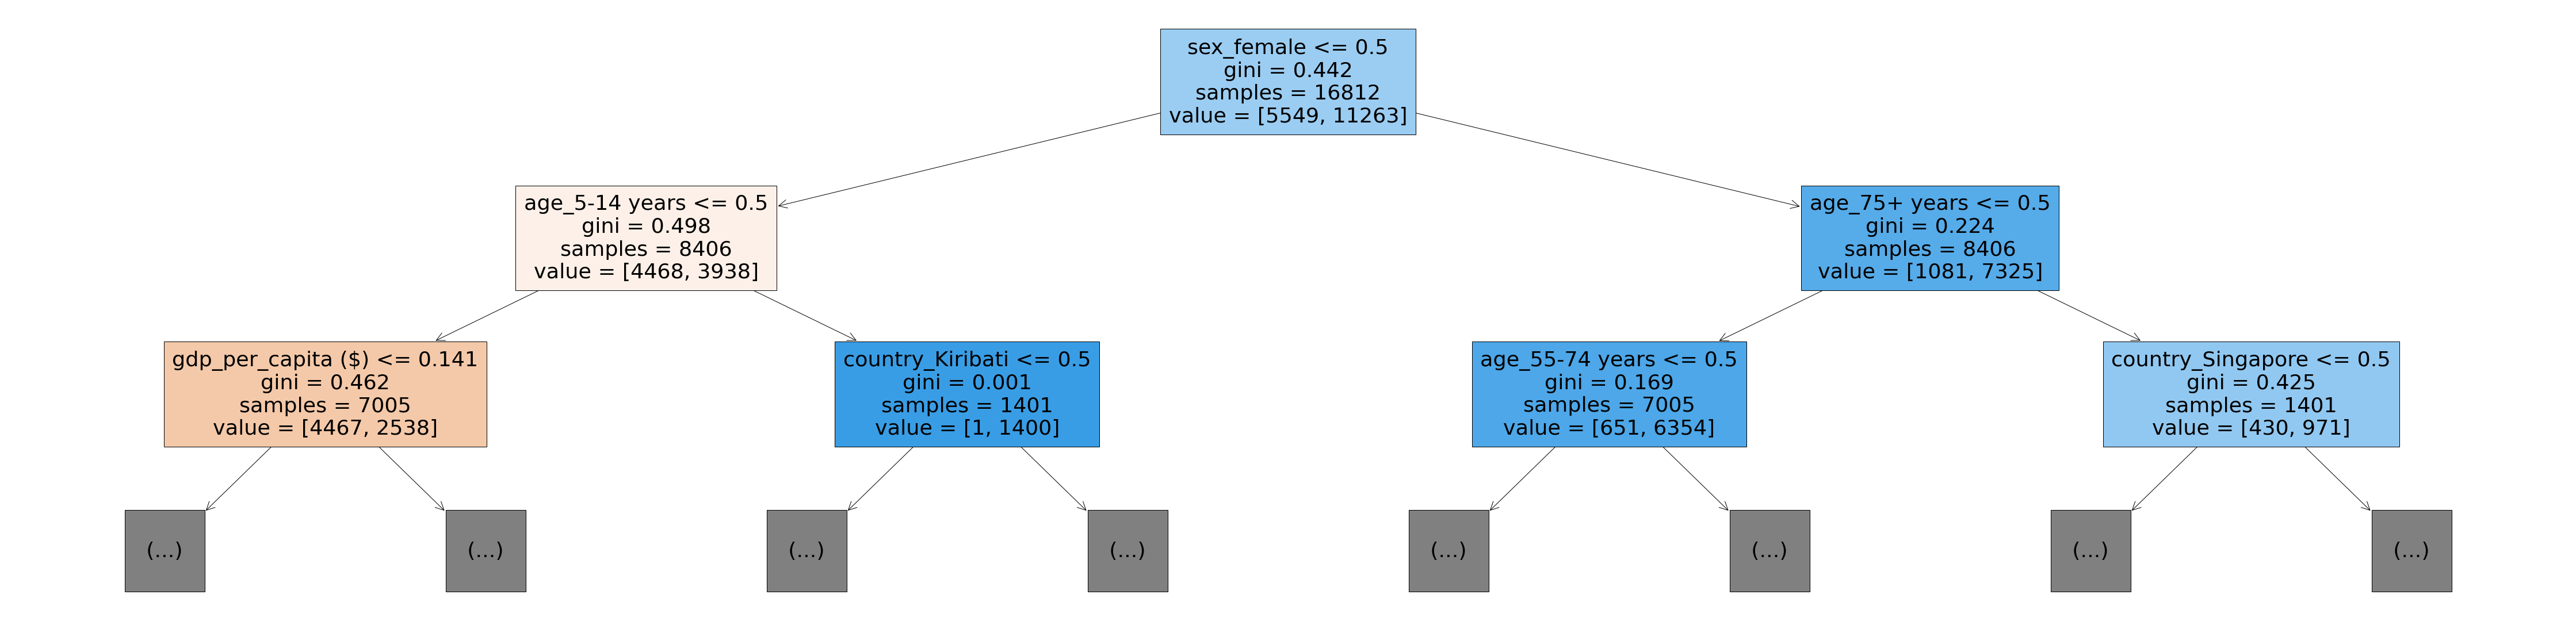

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(80, 20))
plot_tree(tree, feature_names=X_train.columns, max_depth=2, filled=True);